In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [2]:
env = gym.make('BipedalWalker-v2')
env.seed(10)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)

Episode 100	Average Score: -98.38	Score: -100.67
Episode 200	Average Score: -96.59	Score: -99.7176
Episode 300	Average Score: -96.23	Score: -97.148
Episode 400	Average Score: -99.44	Score: -97.771
Episode 500	Average Score: -99.29	Score: -100.12
Episode 600	Average Score: -98.68	Score: -106.74
Episode 700	Average Score: -94.62	Score: -64.562
Episode 800	Average Score: -104.43	Score: -135.00
Episode 900	Average Score: -105.10	Score: -115.18
Episode 1000	Average Score: -117.44	Score: -119.30
Episode 1100	Average Score: -121.20	Score: -123.24
Episode 1200	Average Score: -93.88	Score: -52.0305
Episode 1300	Average Score: -116.32	Score: -154.64
Episode 1400	Average Score: -120.07	Score: -122.79
Episode 1500	Average Score: -84.75	Score: -117.040
Episode 1600	Average Score: -114.44	Score: -116.15
Episode 1700	Average Score: -77.42	Score: -57.5035
Episode 1800	Average Score: -73.70	Score: -36.917
Episode 1900	Average Score: -106.87	Score: -125.40
Episode 2000	Average Score: -127.28	Score: -127

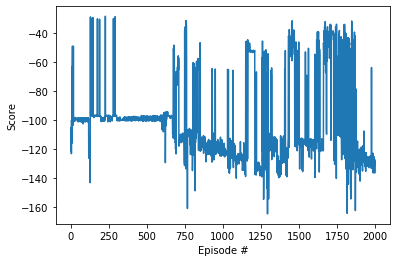

In [3]:
def ddpg(n_episodes=2000, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'output/checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'output/checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [6]:
agent.actor_local.load_state_dict(torch.load('output/checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('output/checkpoint_critic.pth'))

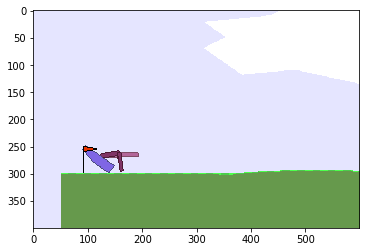

In [7]:
state = env.reset()
agent.reset()   
img = plt.imshow(env.render(mode='rgb_array'))
while True:
    action = agent.act(state)
    img.set_data(env.render(mode='rgb_array'))
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break
        
env.close()